In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# For Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

## Understanding the data 

In [2]:
# Importing the dataset
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the shape of the dataframe
df.shape

(9240, 37)

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Assessing the quantity of missing values in each column
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## Data Cleaning

Finding the categorical variables having a level called **'Select'**, which needs to be handled because it is as good as a null value.

One possible explanation could be that customers didn't make a selection from the available options, resulting in the data defaulting to 'Select' for those columns.

In [7]:
# Identifying columns containing values "Select".
select_columns = []
for cols in df.columns:
    if 'Select' in list(df[cols]):
        select_columns.append(cols)

print(select_columns)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [8]:
# Replacing the value 'Select' with 'NaN'
df = df.replace('Select', np.nan)
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [9]:
# Verifying whether all 'Select' values have been properly handled in the columns
cols_with_select_value = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


In [10]:
# Calculating Percentage of missing values in each column
100*(df.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [11]:
# Dropping columns having >=40% missing values
missing_perc = 100*(df.isna().mean()).sort_values(ascending=False)
col_to_drop = missing_perc[missing_perc>=40].index.to_list()
print("Total columns dropped: ",len(col_to_drop),"\n")
print("List of columns dropped : " , col_to_drop,"\n")
print("Shape before dropping columns: ",df.shape)
    
df.drop(labels=col_to_drop,axis=1, inplace=True)
    
print("Shape after dropping columns: ",df.shape)

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [12]:
100*(df.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [13]:
# Selecting the columns with categorical data
cols_categorical = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(cols_categorical)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


###### We will approach this by assessing the frequency of values within each categorical column and subsequently determining the appropriate course of action for handling any missing values within that specific column.

In [14]:
# Iterating through each categorical column in cols_list, calculate the percentage of value counts
cols_list= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in cols_list:
        percnt=100*df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(percnt,"\n")
        print("_"*120,"\n")

value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manageme

In [15]:
# Calculating the number of missing values and the % of missing values for each column. 
for col in cols_list:
    missing_values_count = df[col].isnull().sum()
    total_values = df[col].shape[0]
    percentage_missing = (missing_values_count / total_values) * 100
    print("Missing Values % for:", col, "\n")
    print("Total missing values:", missing_values_count)
    print("Percentage of missing values:", percentage_missing, "%")
    print('-' * 120)  

Missing Values % for: City 

Total missing values: 3669
Percentage of missing values: 39.70779220779221 %
------------------------------------------------------------------------------------------------------------------------
Missing Values % for: Specialization 

Total missing values: 3380
Percentage of missing values: 36.58008658008658 %
------------------------------------------------------------------------------------------------------------------------
Missing Values % for: Tags 

Total missing values: 3353
Percentage of missing values: 36.28787878787879 %
------------------------------------------------------------------------------------------------------------------------
Missing Values % for: What matters most to you in choosing a course 

Total missing values: 2709
Percentage of missing values: 29.318181818181817 %
------------------------------------------------------------------------------------------------------------------------
Missing Values % for: What is your curre

Now,
- **City**: With nearly 39.71% missing values in the City column, directly imputing Mumbai for the missing entries could heavily skew the data. This skewness might introduce bias into the model. Thus, dropping the City column may be a preferable option.


- **Specialization**: Specialization exhibits a high percentage of missing values, around 36.58%. Notably, the distribution of the selected specializations is relatively uniform. Therefore, neither imputation nor dropping is deemed suitable. Instead, introducing a new category labeled 'Others' is warranted.


- **Tags**: We will drop tags column.


- **What matters most to you in choosing a course**: This column is massively skewed, thus we will drop this column


- **Country**: We can drop the country column


- **What is your current occupation**: We can impute the missing values in this column with 'Unemployed' as it has the most values.


- **Last Activity**: We can impute the missing values with Email opened.


- **Lead Source**: We will impute the missing values with Google.

In [16]:
# Dropping the necessary columns

df.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)

#Shape after drop
df.shape

(9240, 26)

In [17]:
# Dictionary specifying replacement values for missing values in different columns

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}

# Imputing missing values in the DataFrame with the specified values from the dictionary
df=df.fillna(value=missing_values)

In [18]:
# Percentage of null values for remaining columns
(((df.isnull().sum()/df.shape[0])*100)).sort_values(ascending=False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Prospect ID                                 0.000000
Magazine                                    0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Newspaper Article                           0.000000
Search                                      0.000000
Lead Number                                 0.000000
What is your current occupation             0.000000
Specialization                              0.000000
Last Activity                               0.

In [19]:
# TotalVisits
print("TotalVisits - Value Counts")
print("-"*40)
df.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [20]:
# Find missing values in the 'TotalVisits' column
missing_total_visits = df['TotalVisits'].isnull().sum()

# Calculate the total number of values in the 'TotalVisits' column
total_total_visits = df['TotalVisits'].shape[0]

# Calculate the percentage of missing values in the 'TotalVisits' column
percnt_missing_visits = (missing_total_visits / total_total_visits) * 100

# Print the results
print("Missing Values in TotalVisits:", missing_total_visits)
print("Percentage of Missing Values in TotalVisits:", percnt_missing_visits, "%")


Missing Values in TotalVisits: 137
Percentage of Missing Values in TotalVisits: 1.4826839826839828 %


In [21]:
# Imputing TotalVisits missing values with mode
df['TotalVisits'].fillna(df['TotalVisits'].mode()[0], inplace=True)

In [22]:
# Imputing Page Views Per Visit with mode

df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode()[0], inplace=True)

In [23]:
# % of null values after handling categorical and numerical columns

(((df.isnull().sum()/df.shape[0])*100))

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [24]:
# Last Notable Activity
print("Last Notable Activity")
print("-"*55)
100*df['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
-------------------------------------------------------


Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Form Submitted on Website        0.010823
Approached upfront               0.010823
View in browser link Clicked     0.010823
Resubscribed to emails           0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [25]:
#checking for columns with one unique value, where count and freq are same

df.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,...,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,...,2,2,2,2,1,1,1,1,2,16
top,66166c95-8c23-4380-808d-d1d946f6a61e,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,...,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,...,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


In [26]:
# Dropping the List of columns with one unique value whose count and frequency are same
drop_cols = ['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
             'Get updates on DM Content','I agree to pay the amount through cheque']

print("Before Dropping Columns:", df.shape)

# Drop the columns with one unique value

df.drop(drop_cols, axis=1, inplace=True)
print("After Dropping Columns:", df.shape)

Before Dropping Columns: (9240, 26)
After Dropping Columns: (9240, 21)


In [27]:
# Dropping Columns
print("Before Dropping Columns",df.shape)
df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


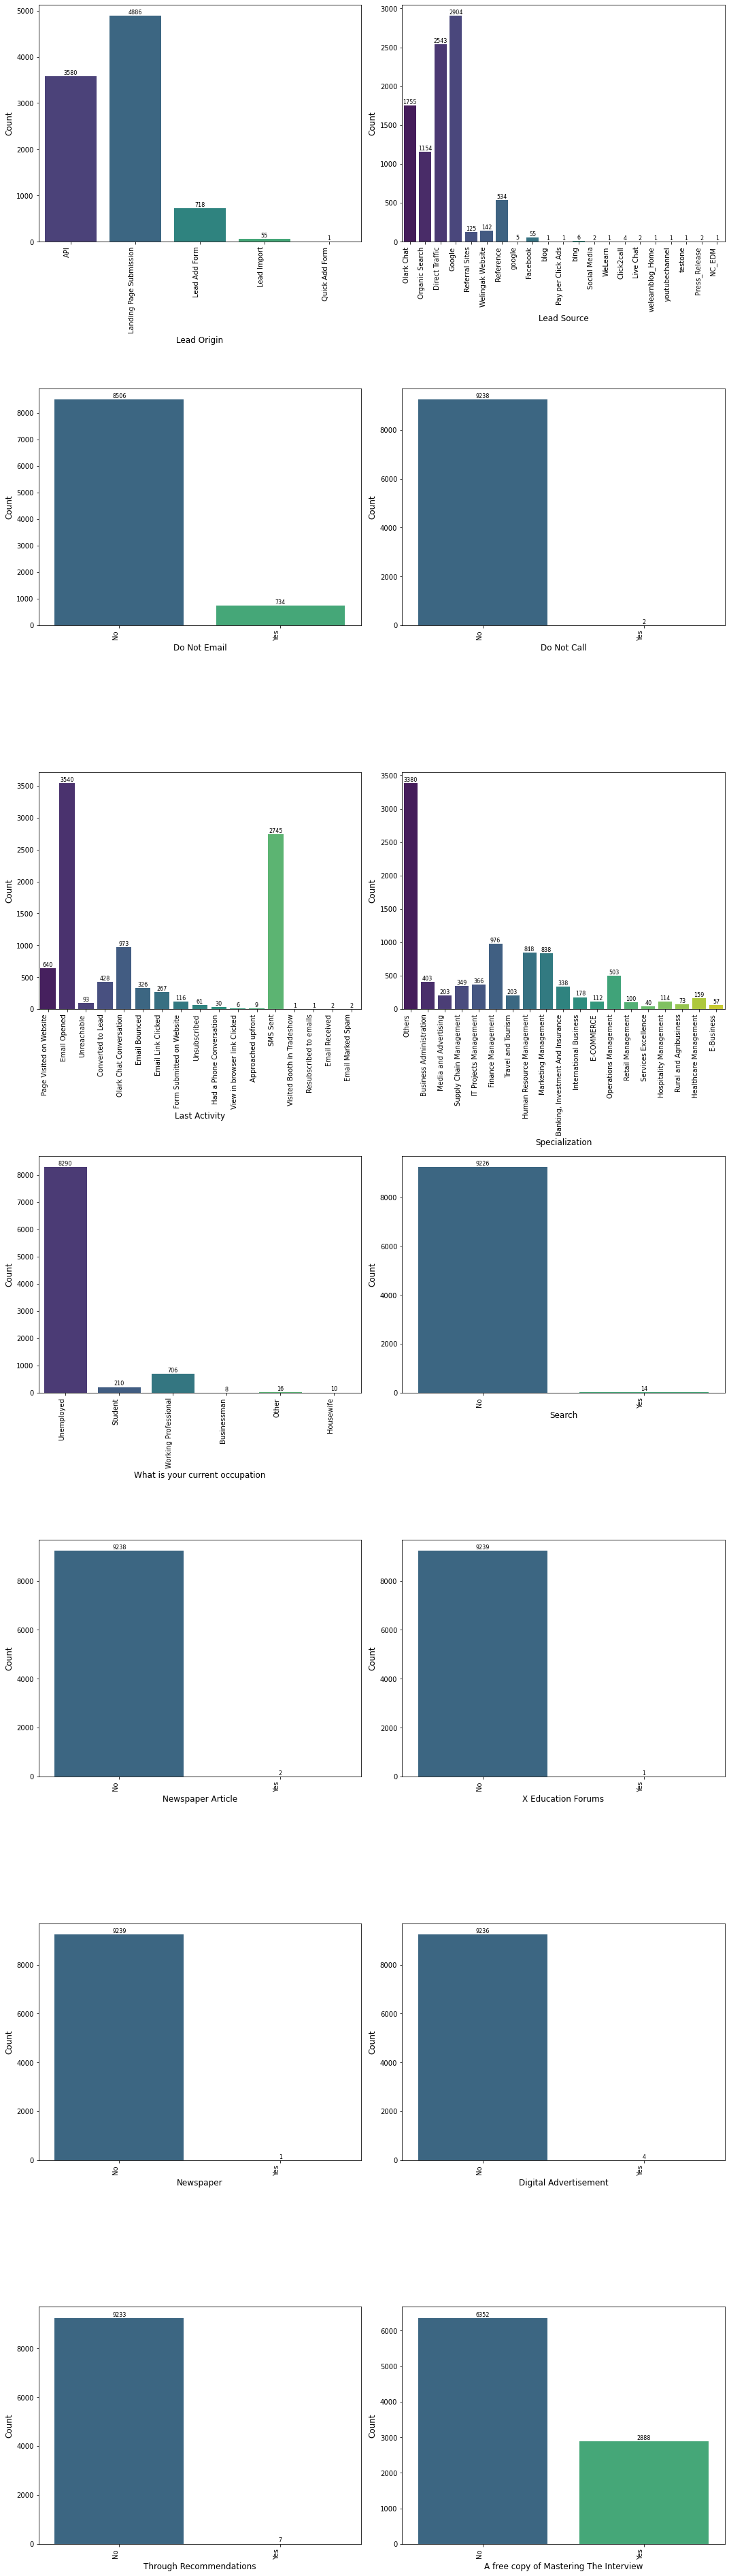

In [28]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(15, 60))

plt.subplots_adjust(wspace=.2, hspace=2)
for i, col in enumerate(categorical_col):
    plt.subplot(8, 2, i + 1)
    ax = sns.countplot(x=col, data=df, palette='viridis')
    plt.xticks(rotation=90, ha='right', fontsize=10)  
    plt.ylabel('Count', fontsize=12)  
    plt.xlabel(col, fontsize=12)  
    
    # Annotating count labels
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)  

plt.tight_layout()
plt.show()


In [29]:
# Dropping categorical columns with highly skewed data


df.drop(['Do Not Call','Newspaper Article',"Search",'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
df.shape

(9240, 11)

In [30]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [31]:
# Defining a function for checking outliers
# For numerical columns
def checking_Outliers(data, columnList):
    plt.figure(figsize=[18, 10])
    plt.subplots_adjust(wspace=0.4, hspace=0.5)

    for i, col in enumerate(columnList):
        plt.subplot(2, 2, i + 1)

        sns.boxplot(y=data[col], color='skyblue', linewidth=2)  
        plt.suptitle("\nChecking Outliers using Boxplot", fontsize=20, color="green", weight='bold')  
        plt.ylabel(None)
        plt.title(col, fontsize=16, color='brown')  # Changed title font size and color

    plt.show()


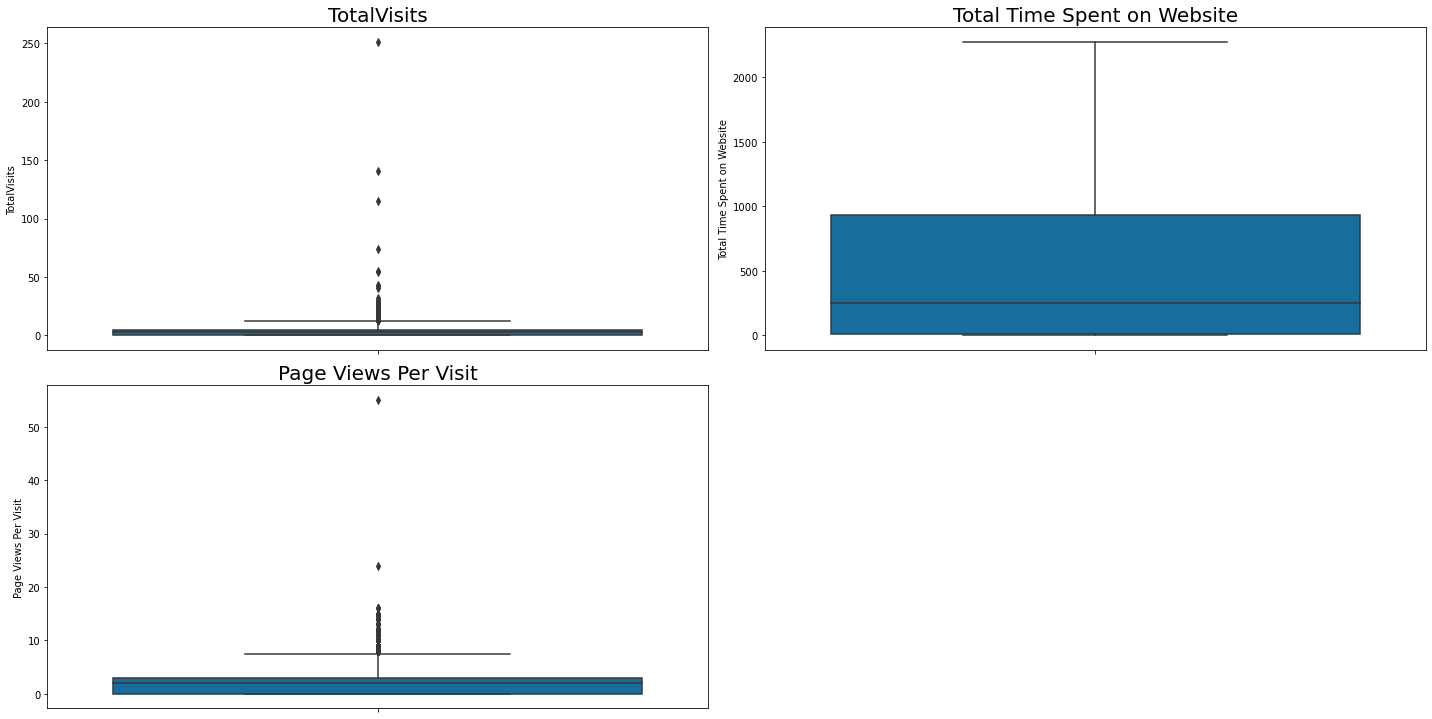

In [32]:
columns_list = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(20, 20))

for i, col in enumerate(columns_list):
    plt.subplot(4, 2, i + 1)
    plt.title(col, fontsize=20)  # Increase font size of the title
    ax = sns.boxplot(y=col, data=df, palette='colorblind')  # Change the color palette

plt.tight_layout()
plt.show()


In [33]:
# Treating outliers in the DataFrame using capping and flooring technique.
def outlier_treatment(df, column_list):
    for col in column_list:
        q1 = df[col].describe()["25%"]
        q3 = df[col].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5 * IQR
        lower_bound = q1 - 1.5 * IQR

        # Capping upper_bound
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

        # Flooring lower_bound
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

columns_to_treat = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
outlier_treatment(df, columns_to_treat)

In [34]:
# Assessing Outliers in Numerical Variables other than the Target Variable
capping_columns = ["Page Views Per Visit","TotalVisits"]

# Custom User-Defined Function (UDF) for Outlier Treatment
outlier_treatment(df, capping_columns)

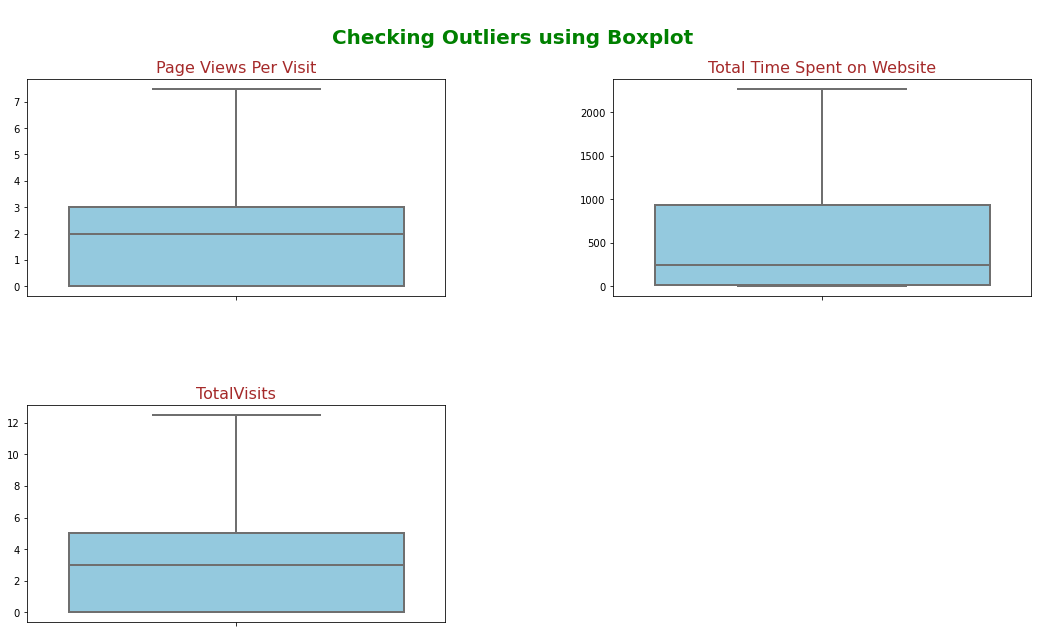

In [35]:
# Boxplots after Outlier Treatment

num_colms = ["Page Views Per Visit","Total Time Spent on Website",'TotalVisits']

checking_Outliers(df,num_colms)

In [36]:
# percentile values after outlier treatment 
df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000


In [37]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,No


In [38]:
# Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_"*70,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

______________________________________________________________________ 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Social Media          0.021645
Press_Release         0.021645
Live Chat             0.021645
NC_EDM                0.010823
youtubechannel        0.010823
blog                  0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
testone         

- We've observed that certain categories or levels within the "Lead Score" and "Last Activity" columns contain a limited number of records. To avoid cluttering the dataset with numerous unnecessary columns when generating dummy variables, we intend to consolidate these categories into a single category labeled as "Others". This approach will help maintain a clean and organized dataset.

- Additionally, we've identified that "Google" and "google" are essentially the same in the "Lead Source" column. Therefore, we plan to standardize the case for consistency.

In [39]:
# Grouping low frequency value levels to Others
df['Lead Source'] = df['Lead Source'].replace(["bing","Press_Release","Click2call"
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df['Lead Source'] = df['Lead Source'].replace("google","Google")

In [40]:
# value_counts percentage after replace
df['Last Activity'].value_counts(normalize=True)*100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

In [41]:
# Defining a dictionary to map 'Yes' to 1 and 'No' to 0
binary_mapping = {'Yes': 1, 'No': 0}

# Mapping the values in the 'Do Not Email' column using the defined dictionary
df['Do Not Email'].replace(binary_mapping, inplace=True)

# Mapping the values in the 'A free copy of Mastering The Interview' column using the defined dictionary
df['A free copy of Mastering The Interview'].replace(binary_mapping, inplace=True)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   float64
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

## Exploratory Data Analysis 

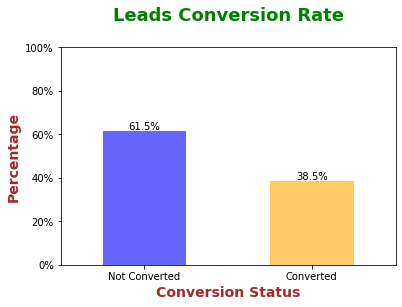

In [43]:
# plotting the results on a bar plot

ax = (100 * df["Converted"].value_counts(normalize=True)).plot.bar(color=["Blue", "Orange"], alpha=0.6)

# Adding and formatting title
plt.title("Leads Conversion Rate\n", fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'Green'})

# Labeling Axes
plt.xlabel('Conversion Status', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'Brown'})
plt.ylabel("Percentage", fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'Brown'})

# Modify ticks on the y-axis
ticks = np.arange(0, 101, 20)
labels = ["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks, labels)

# Xticks
plt.xticks([0, 1], ["Not Converted", "Converted"], rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


Observations:

The conversion rate stands at 38.5%, indicating that only a minority, specifically 38.5% of individuals, have successfully converted to leads. On the other hand, the majority, comprising 61.5% of the population, did not convert into leads.

In [44]:
# Ratio of Imbalance in the data

ratio=(df["Converted"].value_counts(normalize=True).loc[0])/(df["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


In [45]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,0


### Univariate Analysis

In [46]:
#Categorical columns list
cat_cols = ["Lead Origin","What is your current occupation","Do Not Email",
            "A free copy of Mastering The Interview","Lead Source","Last Activity","Specialization"]

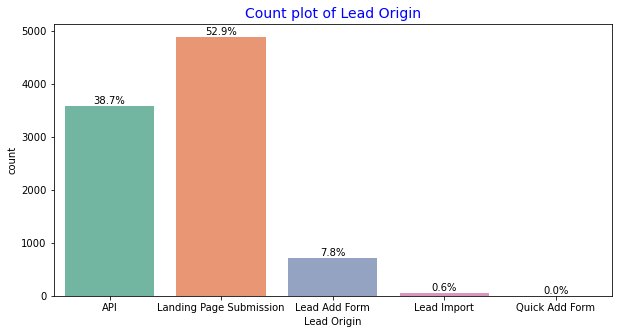

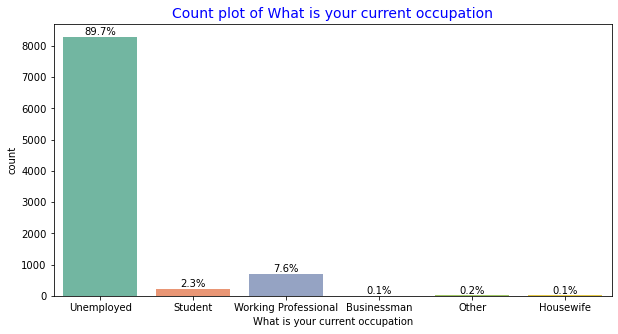

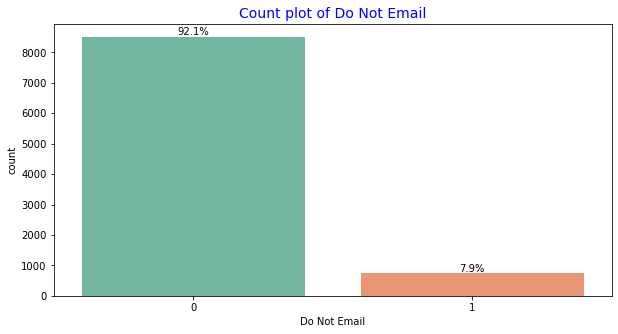

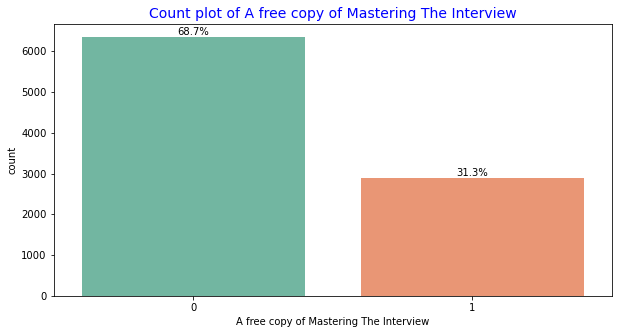

In [47]:
for col in cat_cols[:4]:    
    plt.figure(figsize=[10, 5])
    plt.title("Count plot of {}".format(col), color="blue", fontsize=14)
    ax = sns.countplot(x=col, data=df, palette='Set2')  # Changed the color palette

    total = len(df[col])
    plt.xticks(rotation=0)

    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                    fontsize=10, color='black') 

plt.show()


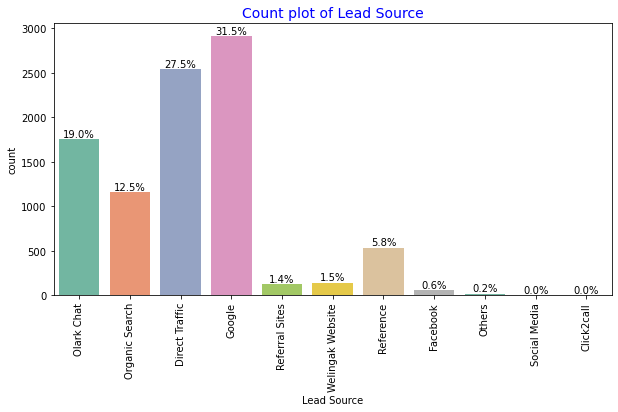

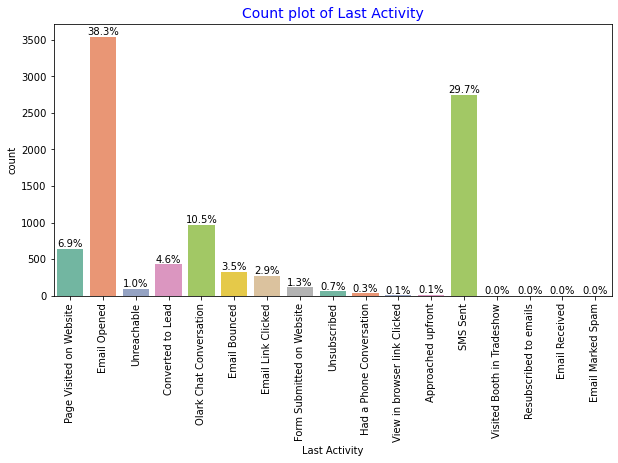

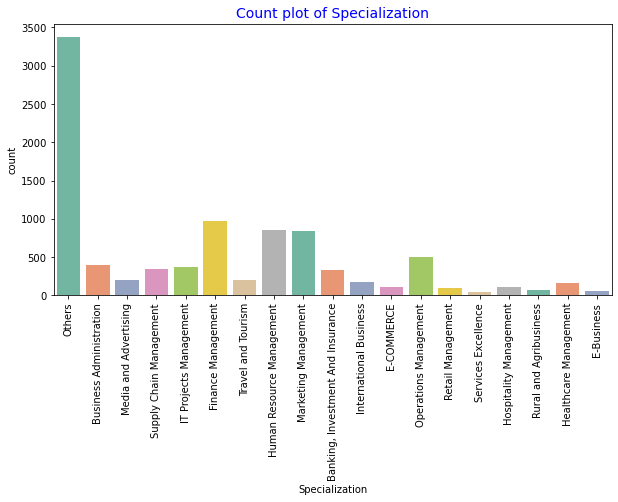

In [48]:
for col in cat_cols[4:]:
    plt.figure(figsize=[10, 5])
    plt.title("Count plot of {}".format(col), color="blue", fontsize=14)
    ax = sns.countplot(x=col, data=df, palette='Set2')  # Changed the color palette

    total = len(df[col])
    plt.xticks(rotation=90)
    
    if col != "Specialization":  # Check if the column is not 'Specialization' to avoid messy xtick labels
        for p in ax.patches:
            text = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                        fontsize=10, color='black')  # Changed font properties and color
    else:
        pass

plt.show()


### Bivariate Analysis

In [49]:
# Defining a function for bivariate analysis
def Bivariate_cat(df, variable_name, Target="Converted"):
    plt.figure(figsize=(18, 8))

    # 1st plot in subplot
    plt.subplot(1, 2, 1)
    plt.title("Distribution of {}".format(variable_name), color="blue", fontsize=14)
    ax = sns.countplot(x=variable_name, hue=Target, data=df, palette="Set1", alpha=0.6)  # Changed color palette

    total = len(df[variable_name])
    plt.xticks(rotation=90)  # Rotated xtick labels by 90 degrees
    plt.legend(["No", "Yes"], title="Converted", fontsize=10)

    # Annotation for 1st plot
    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)

    # 2nd plot
    plt.subplot(1, 2, 2)
    plt.title("Lead Conversion Rate of {}".format(variable_name), color="green", fontsize=14)
    ax = sns.countplot(x=variable_name, hue=Target, data=df, palette="Set2", alpha=0.8)  # Changed color palette

    # Modifications
    plt.xticks(rotation=90)  # Rotated xtick labels by 90 degrees
    plt.ylabel("Count", color='brown', fontsize=12)
    plt.xlabel("{}".format(variable_name), fontsize=12)
    plt.legend(labels=["Not Converted", "Converted"], title="Lead Conversion Rate", fontsize=10)

    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total):.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=10, ha='center',
                        va='bottom')


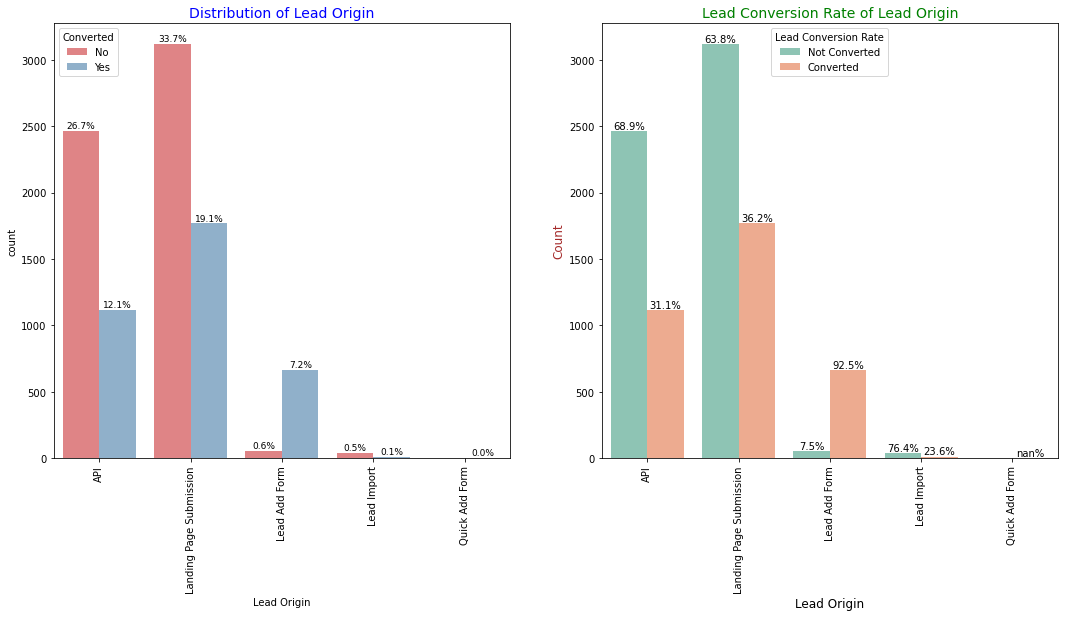

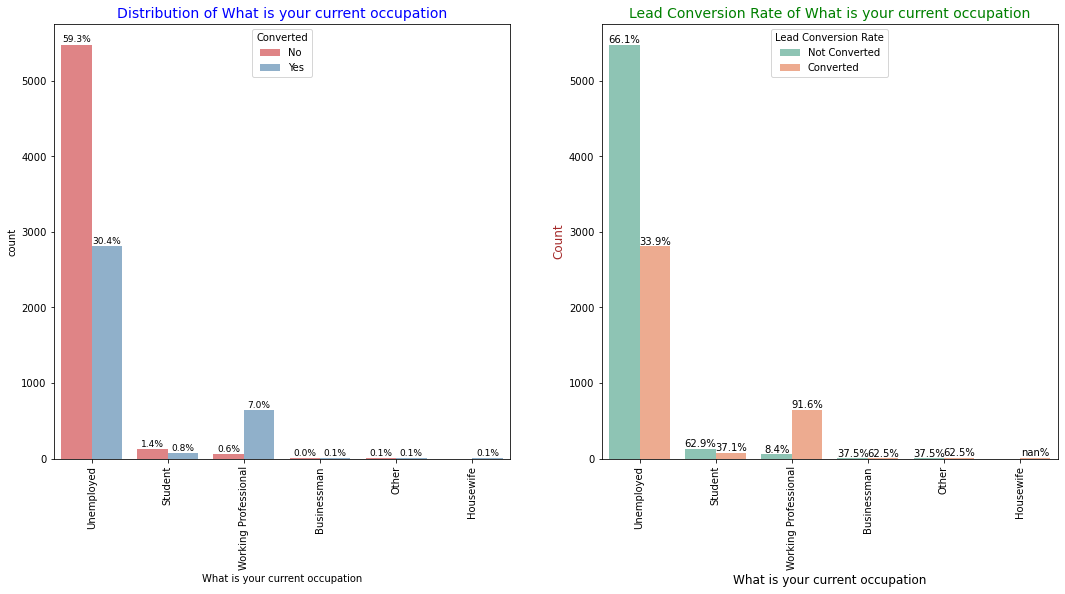

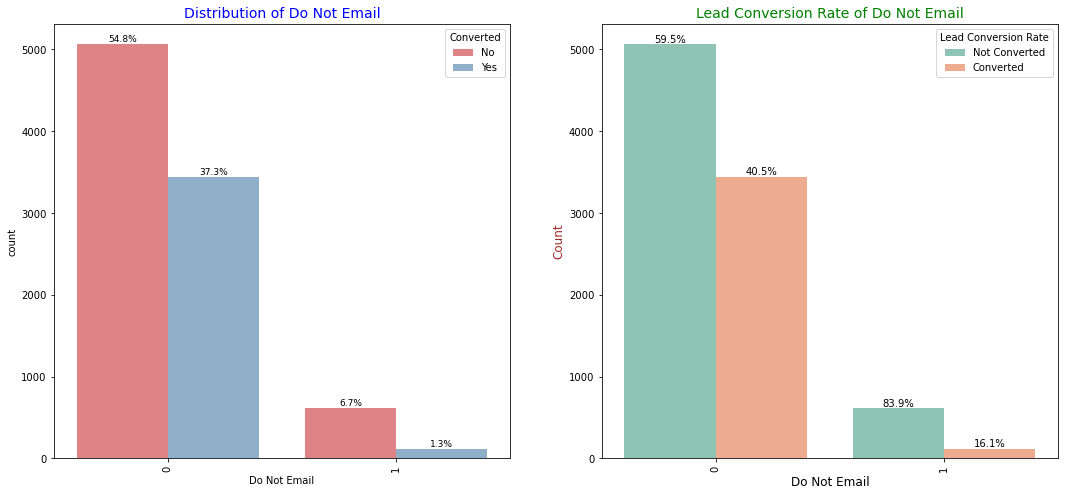

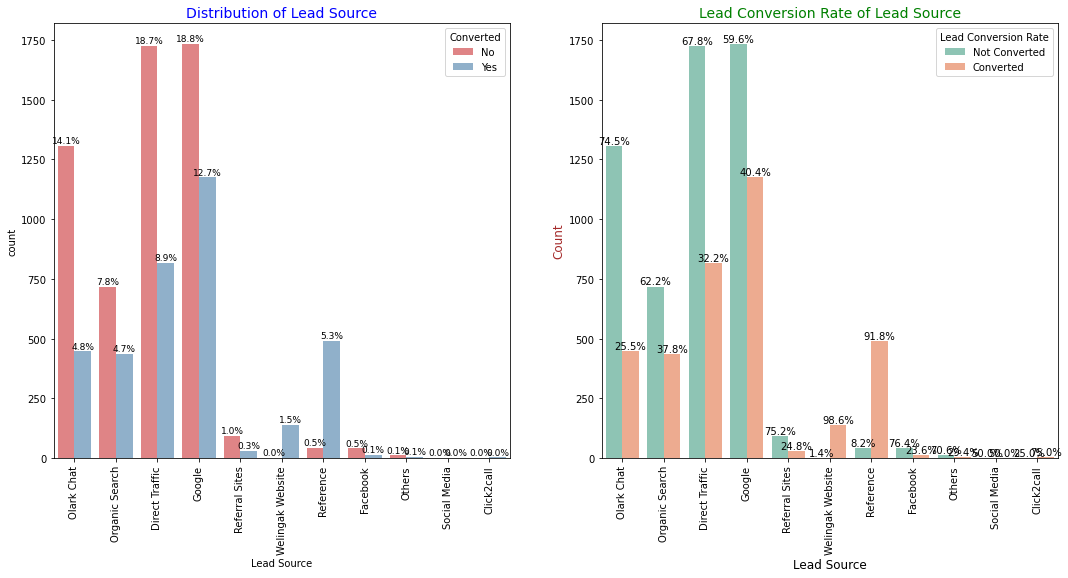

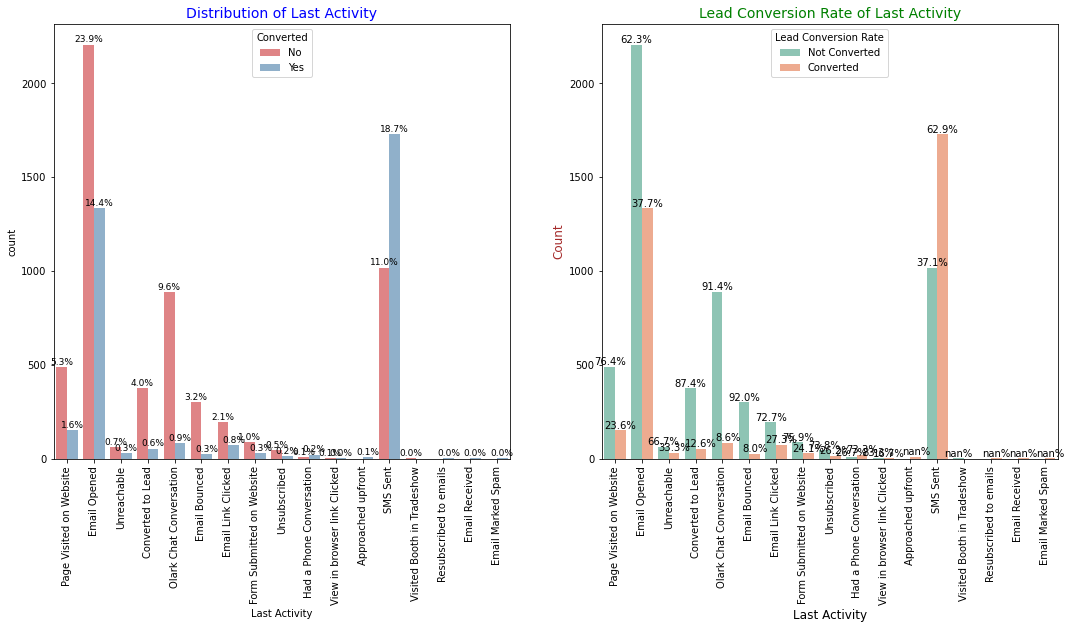

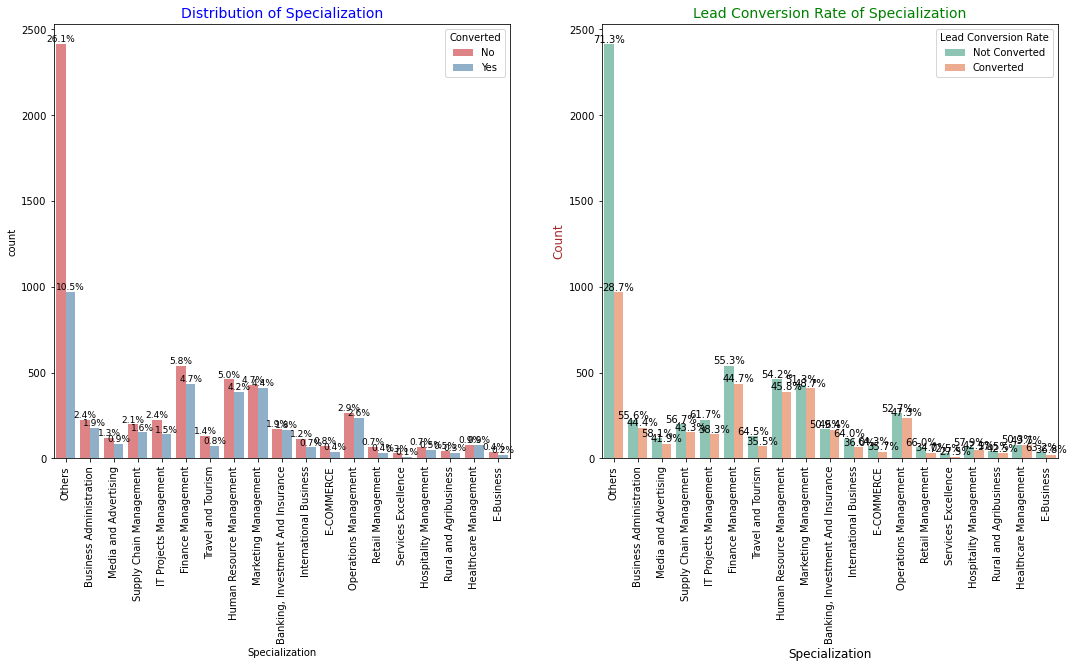

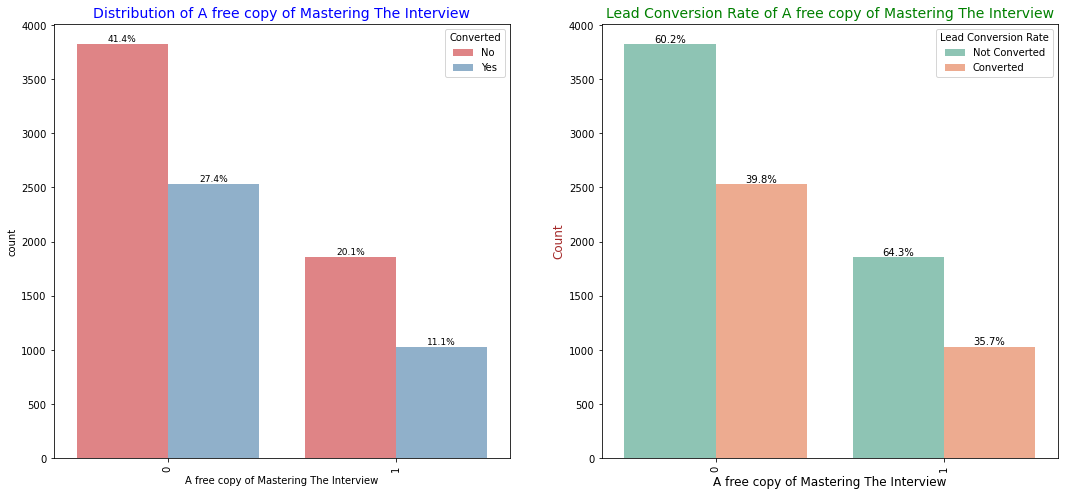

In [50]:
# Performing Bivariate Analysis for these variables using loop and the defined function 

cat_cols = ["Lead Origin","What is your current occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","A free copy of Mastering The Interview"]

for i in cat_cols:
    Bivariate_cat(df,variable_name=i)
    

**Analysis outcomes**

- Approximately 52% of leads originated through "Landing Page Submission," boasting a lead conversion rate (LCR) of 36%. Meanwhile, the "API" detected roughly 39% of customers, yielding a lead conversion rate (LCR) of 31%.

- Approximately 90% of customers are categorized as Unemployed, demonstrating a lead conversion rate (LCR) of 34%. Conversely, Working Professionals comprise only 7.6% of the total customer base but exhibit an almost 92% lead conversion rate (LCR).

- 92% of individuals have indicated their preference not to receive emails regarding the course.

- Google achieves a lead conversion rate (LCR) of 40.4% from 31% of its customers. Direct Traffic, on the other hand, yields a slightly lower LCR of 32% with 27% of customers, which is less than that of Google. Organic Search accounts for 37.8% of LCR, but it is represented by only 12.5% of customers. In comparison, Reference demonstrates an impressive LCR of 91%, albeit with a smaller customer base of around 6%.

- The feature 'SMS Sent' exhibits a notably high lead conversion rate of around 63%.

- Marketing Managemt,HR Management,Finance Management shows good conversion rates.

<Figure size 1440x720 with 0 Axes>

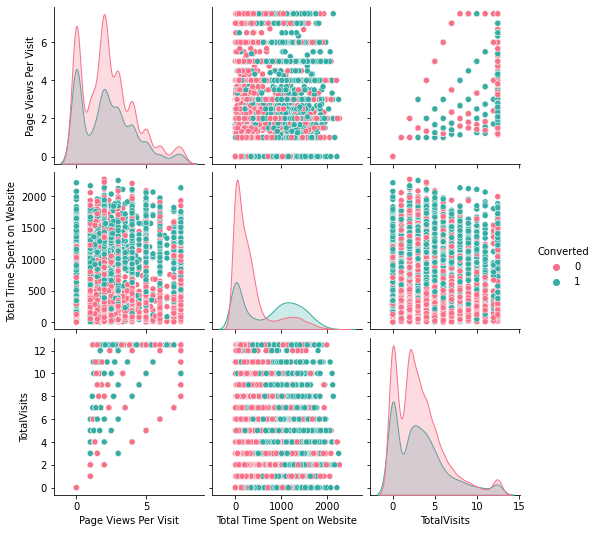

In [51]:
plt.figure(figsize=(20, 10)) 

sns.pairplot(data=df, vars=num_colms, hue="Converted", palette="husl")

plt.show()

In [52]:
num_columns =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

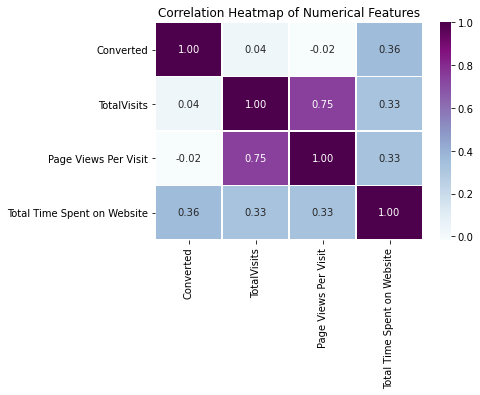

In [53]:
# Heatmap to show correlation between the numerical variables
sns.heatmap(data=df[num_columns].corr(), cmap="BuPu", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')

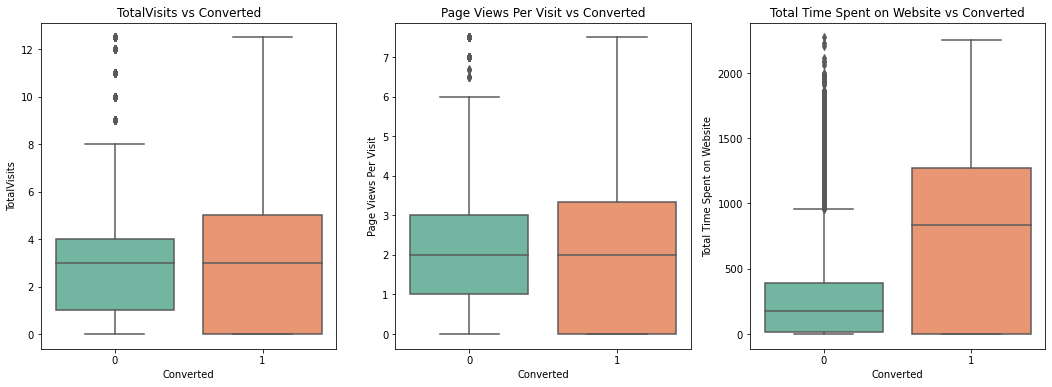

In [54]:
# Boxplot with Converted as hue

plt.figure(figsize=(18, 6))  

# Plotting boxplots
plt.subplot(1, 3, 1)
sns.boxplot(y='TotalVisits', x='Converted', data=df, palette='Set2')  
plt.title('TotalVisits vs Converted')

plt.subplot(1, 3, 2)
sns.boxplot(y='Page Views Per Visit', x='Converted', data=df, palette='Set2') 
plt.title('Page Views Per Visit vs Converted')

plt.subplot(1, 3, 3)
sns.boxplot(y='Total Time Spent on Website', x='Converted', data=df, palette='Set2')  
plt.title('Total Time Spent on Website vs Converted')  

plt.show()


The boxplot reveals that leads who spend more time on the website are more likely to be successfully converted compared to those who spend less time.

## Data Preparation

In [55]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,0


In [56]:
# Creating dummy variables for some of the categorical variables 
dummy = pd.get_dummies(df[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"]], drop_first=True)

# Adding results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [57]:
# As we have created dummies for the below variables, we can drop them

df = df.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"],1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   float64
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

In [59]:
df.shape

(9240, 59)

## Train-Test-Split

In [60]:
# Predictor variables in X
X = df.drop('Converted', axis=1)

# Putting Target variables in y
y = df["Converted"]

In [61]:
# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [62]:
print("X_train:", X_train.shape)
print("y_train:",y_train.shape)

X_train: (6468, 58)
y_train: (6468,)


In [63]:
print("X_test:", X_test.shape)
print("y_test:",y_test.shape)

X_test: (2772, 58)
y_test: (2772,)


## Feature Scaling

In [64]:
# using standard scaler for feature scaling
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [65]:
# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
# Checking the Lead Conversion Rate (LCR) with "Converted" as our Target Variable

LCR = (sum(df['Converted'])/len(df['Converted'].index))*100
LCR

38.53896103896104

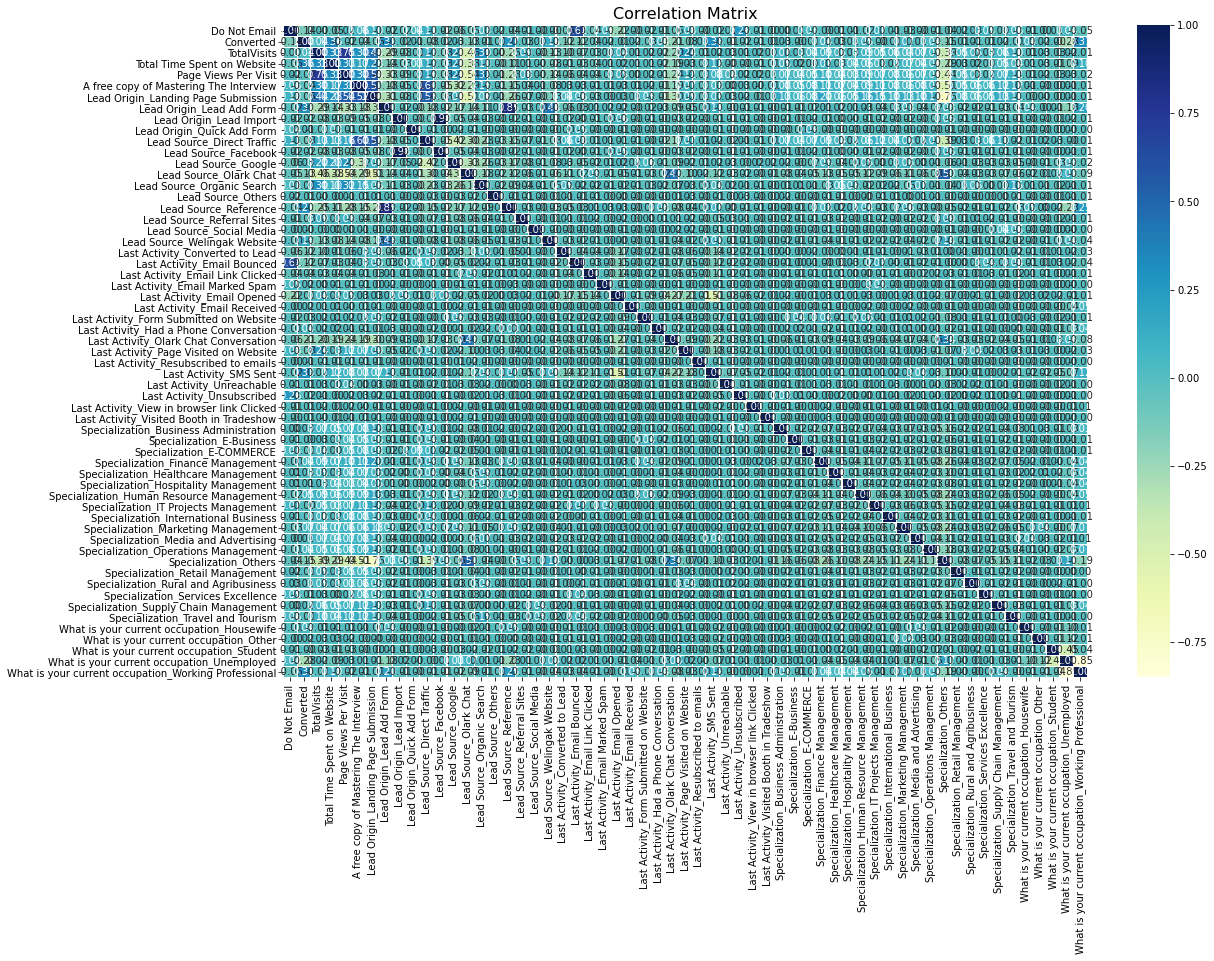

In [67]:
plt.figure(figsize=(18, 12)) 

# Plotting correlation matrix heatmap
sns.heatmap(df.corr(), linewidths=0.1, cmap="YlGnBu", annot=True, fmt=".2f") 
plt.title('Correlation Matrix', fontsize=16)  
plt.show()



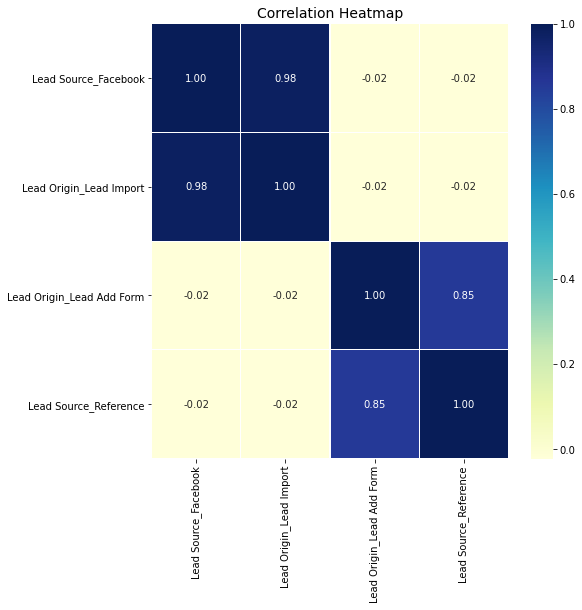

In [68]:
plt.figure(figsize=(8, 8)) 

# Plotting correlation heatmap for specific columns
sns.heatmap(df[["Lead Source_Facebook", "Lead Origin_Lead Import", "Lead Origin_Lead Add Form", "Lead Source_Reference"]].corr(), 
            linewidths=0.1, cmap="YlGnBu", annot=True, fmt=".2f")  
plt.title('Correlation Heatmap', fontsize=14)  
plt.show()

In [69]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## Model Building

In [70]:
# Using RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [71]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 20),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', False, 30),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', False, 36),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Marked Spam', False, 19),
 ('Last Activity_Email Opened', False, 38),
 ('Last Activity_Email Received', False, 28),
 ('Last Activity_Form Submitted 

In [72]:
# Checking the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
55,What is your current occupation_Working Profes...,True,1
16,Lead Source_Welingak Website,True,1
14,Lead Source_Referral Sites,True,1
13,Lead Source_Reference,True,1
24,Last Activity_Had a Phone Conversation,True,1
25,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Converted to Lead,True,1
8,Lead Source_Facebook,True,1
18,Last Activity_Email Bounced,True,1
28,Last Activity_SMS Sent,True,1


In [73]:
# columns selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [74]:
# columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Social Media',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specializati

### Model-1 

In [75]:
# Building model using statsmodels

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                                    0.121062
Total Time Spent on Website                              0.955528
Lead Origin_Landing Page Submission                     -1.557645
Lead Source_Facebook                                    -0.991387
Lead Source_Reference                                    2.491246
Lead Source_Referral Sites                              -0.480684
Lead Source_Welingak Website                             4.906439
Last Activity_Converted to Lead                         -1.269915
Last Activity_Email Bounced                             -1.687745
Last Activity_Had a Phone Conversation                   1.931756
Last Activity_Olark Chat Conversation                   -1.192085
Last Activity_SMS Sent                                   1.226453
Specialization_Hospitality Management                   -0.960727
Specialization_Others                                   -1.121006
What is your current occupation_Housewife               22.911691
What is yo

In [76]:
# Model-1 summary
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2764.2
Date:                Sun, 18 Feb 2024   Deviance:                       5528.4
Time:                        22:32:48   Pearson chi2:                 9.29e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

We will remove 'What is your current occupation_Housewife' as it has a high p-value 

### Model-2

In [77]:
# Dropping 'Current_occupation_Housewife' 
rfe_col=rfe_col.drop("What is your current occupation_Housewife")

In [78]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Creating a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                                   0.127024
Total Time Spent on Website                             0.954859
Lead Origin_Landing Page Submission                    -1.552465
Lead Source_Facebook                                   -0.992030
Lead Source_Reference                                   2.507493
Lead Source_Referral Sites                             -0.482820
Lead Source_Welingak Website                            4.906695
Last Activity_Converted to Lead                        -1.276612
Last Activity_Email Bounced                            -1.695843
Last Activity_Had a Phone Conversation                  1.921976
Last Activity_Olark Chat Conversation                  -1.196084
Last Activity_SMS Sent                                  1.217951
Specialization_Hospitality Management                  -0.967186
Specialization_Others                                  -1.124229
What is your current occupation_Working Professional    2.690320
dtype: float64

In [79]:
#Model-2 summary
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2771.3
Date:                Sun, 18 Feb 2024   Deviance:                       5542.6
Time:                        22:32:48   Pearson chi2:                 9.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

 We will drop 'Lead Source_Referral Sites' as it has a high p-value

### Model-3

In [80]:
# Dropping 'Lead Source_Referral Sites' 
rfe_col=rfe_col.drop("Lead Source_Referral Sites")

In [81]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

X_train_sm3 = sm.add_constant(X_train_rfe)

logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                                   0.114153
Total Time Spent on Website                             0.952634
Lead Origin_Landing Page Submission                    -1.542909
Lead Source_Facebook                                   -0.977992
Lead Source_Reference                                   2.519270
Lead Source_Welingak Website                            4.920247
Last Activity_Converted to Lead                        -1.282459
Last Activity_Email Bounced                            -1.690493
Last Activity_Had a Phone Conversation                  1.913510
Last Activity_Olark Chat Conversation                  -1.194479
Last Activity_SMS Sent                                  1.223766
Specialization_Hospitality Management                  -0.965465
Specialization_Others                                  -1.129310
What is your current occupation_Working Professional    2.685926
dtype: float64

In [82]:
#Model-3 summary
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.7
Date:                Sun, 18 Feb 2024   Deviance:                       5545.3
Time:                        22:32:48   Pearson chi2:                 9.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

We will drop 'Lead Source_Facebook' as it has a high p-value

### Model-4 

In [83]:
# Dropping 'Lead Source_Facebook' 
rfe_col=rfe_col.drop("Lead Source_Facebook")

In [84]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

X_train_sm4 = sm.add_constant(X_train_rfe)

logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                                   0.095233
Total Time Spent on Website                             0.953557
Lead Origin_Landing Page Submission                    -1.525056
Lead Source_Reference                                   2.536465
Lead Source_Welingak Website                            4.934067
Last Activity_Converted to Lead                        -1.275896
Last Activity_Email Bounced                            -1.684940
Last Activity_Had a Phone Conversation                  1.917582
Last Activity_Olark Chat Conversation                  -1.181018
Last Activity_SMS Sent                                  1.224714
Specialization_Hospitality Management                  -0.983081
Specialization_Others                                  -1.124104
What is your current occupation_Working Professional    2.683967
dtype: float64

In [85]:
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2774.7
Date:                Sun, 18 Feb 2024   Deviance:                       5549.4
Time:                        22:32:48   Pearson chi2:                 9.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Model 4 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.

In [86]:
# Checking the VIF
X = pd.DataFrame()
X['Features'] = X_train_rfe.columns
X['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
X['VIF'] = round(X['VIF'], 2)
X = X.sort_values(by='VIF', ascending=False)
X = X.reset_index(drop=True)
print(X)   

                                             Features   VIF
0                               Specialization_Others  1.60
1                              Last Activity_SMS Sent  1.57
2                 Lead Origin_Landing Page Submission  1.49
3               Last Activity_Olark Chat Conversation  1.35
4   What is your current occupation_Working Profes...  1.18
5                               Lead Source_Reference  1.17
6                         Total Time Spent on Website  1.14
7                     Last Activity_Converted to Lead  1.09
8                         Last Activity_Email Bounced  1.08
9                        Lead Source_Welingak Website  1.05
10              Specialization_Hospitality Management  1.02
11             Last Activity_Had a Phone Conversation  1.01


- Here we can see that all the VIF values are far less than 5. 
- The p-values are also less than 0.05.
- Thus we will use this finally for futher processing.

In [87]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)          

y_train_pred[:10]

1871    0.321035
6795    0.072529
3516    0.156016
8105    0.749642
3934    0.133181
4844    0.986009
3297    0.106617
8071    0.999074
987     0.150968
7423    0.888812
dtype: float64

In [88]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Probability':y_train_pred.values})
# Assigning Customer ID for each records
y_train_pred_final['Cust_Id'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Probability,Cust_Id
0,0,0.321035,1871
1,0,0.072529,6795
2,0,0.156016,3516
3,0,0.749642,8105
4,0,0.133181,3934


In [89]:
# Creating columns with different probability cutoffs 
numbers = [float(x/10) for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_Probability'].map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Probability,Cust_Id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.321035,1871,1,1,1,1,0,0,0,0,0,0
1,0,0.072529,6795,1,0,0,0,0,0,0,0,0,0
2,0,0.156016,3516,1,1,0,0,0,0,0,0,0,0
3,0,0.749642,8105,1,1,1,1,1,1,1,1,0,0
4,0,0.133181,3934,1,1,0,0,0,0,0,0,0,0


In [90]:
# Creating an empty DataFrame to store evaluation metrics
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

# List of probability cutoff values to iterate through
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity  = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.545300     0.981346     0.276612
0.2   0.2  0.746599     0.900649     0.651674
0.3   0.3  0.782004     0.859286     0.734383
0.4   0.4  0.797619     0.725872     0.841829
0.5   0.5  0.801639     0.655312     0.891804
0.6   0.6  0.798083     0.592457     0.924788
0.7   0.7  0.777520     0.494323     0.952024
0.8   0.8  0.752938     0.397810     0.971764
0.9   0.9  0.706555     0.242903     0.992254


<Figure size 720x432 with 0 Axes>

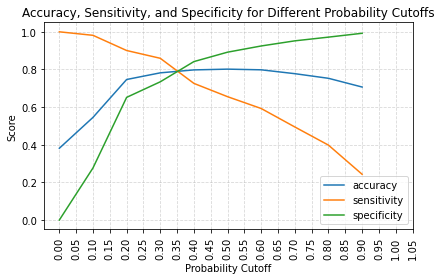

In [91]:

plt.figure(figsize=(10, 6))

# Plotting accuracy, sensitivity, and specificity for various probabilities
cutoff_df.plot(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.title('Accuracy, Sensitivity, and Specificity for Different Probability Cutoffs')
plt.xticks(np.arange(0, 1.1, 0.05), rotation=90) 
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()  
plt.show()


From the above plot we can see that the optimal probability cutoff is **0.35** 

In [92]:
# Creating a column with name "Predicted" i.e. the predicted value for 0.35 cutoff 
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_Probability'].map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Probability,Cust_Id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
0,0,0.321035,1871,1,1,1,1,0,0,0,0,0,0,0
1,0,0.072529,6795,1,0,0,0,0,0,0,0,0,0,0
2,0,0.156016,3516,1,1,0,0,0,0,0,0,0,0,0
3,0,0.749642,8105,1,1,1,1,1,1,1,1,0,0,1
4,0,0.133181,3934,1,1,0,0,0,0,0,0,0,0,0


In [93]:
# Creating Lead Score column
y_train_pred_final['Lead Score'] = round((y_train_pred_final['Converted_Probability']*100))
y_train_pred_final.head()

,Converted,Converted_Probability,Cust_Id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted,Lead Score
0,0,0.321035,1871,1,1,1,1,0,0,0,0,0,0,0,32.0
1,0,0.072529,6795,1,0,0,0,0,0,0,0,0,0,0,7.0
2,0,0.156016,3516,1,1,0,0,0,0,0,0,0,0,0,16.0
3,0,0.749642,8105,1,1,1,1,1,1,1,1,0,0,1,75.0
4,0,0.133181,3934,1,1,0,0,0,0,0,0,0,0,0,13.0


In [94]:
# Dataframe for predicted converted leads
y_train_pred_converted = y_train_pred_final[y_train_pred_final['Predicted']==1]
y_train_pred_converted.head()

,Converted,Converted_Probability,Cust_Id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted,Lead Score
3,0,0.749642,8105,1,1,1,1,1,1,1,1,0,0,1,75.0
5,1,0.986009,4844,1,1,1,1,1,1,1,1,1,1,1,99.0
7,1,0.999074,8071,1,1,1,1,1,1,1,1,1,1,1,100.0
9,1,0.888812,7423,1,1,1,1,1,1,1,1,1,0,1,89.0
10,1,0.794650,1032,1,1,1,1,1,1,1,1,0,0,1,79.0


Customers with a Lead Score exceeding 35 will be converted, as we've determined the optimal probability cutoff to be 0.35. The likelihood of conversion increases with a higher Lead Score.

In [95]:
# Average Lead Score of the predicted converted leads
avg_converted = round(sum(y_train_pred_converted['Lead Score'])/len(y_train_pred_converted.index))
avg_converted

70

In [96]:
# Predicted not converted leads
y_train_pred_not_converted = y_train_pred_final[y_train_pred_final['Predicted']==0]
y_train_pred_not_converted

,Converted,Converted_Probability,Cust_Id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted,Lead Score
0,0,0.321035,1871,1,1,1,1,0,0,0,0,0,0,0,32.0
1,0,0.072529,6795,1,0,0,0,0,0,0,0,0,0,0,7.0
2,0,0.156016,3516,1,1,0,0,0,0,0,0,0,0,0,16.0
4,0,0.133181,3934,1,1,0,0,0,0,0,0,0,0,0,13.0
6,0,0.106617,3297,1,1,0,0,0,0,0,0,0,0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,0,0.135044,7906,1,1,0,0,0,0,0,0,0,0,0,14.0
6463,1,0.321035,350,1,1,1,1,0,0,0,0,0,0,0,32.0
6465,1,0.133181,8039,1,1,0,0,0,0,0,0,0,0,0,13.0
6466,0,0.041698,6936,1,0,0,0,0,0,0,0,0,0,0,4.0


In [97]:
# Average Lead Score for the predicted not converted leads
avg_not_converted = round(sum(y_train_pred_not_converted['Lead Score'])/len(y_train_pred_not_converted.index))
avg_not_converted

15

We can see that the average Lead Score of the customers, who were not converted is 15.

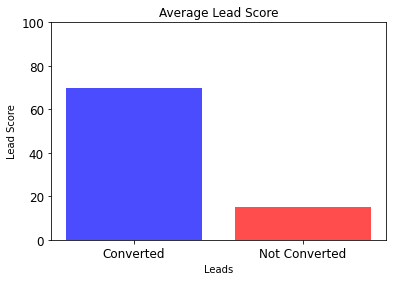

In [98]:
plt.bar(['Converted', 'Not Converted'], [avg_converted, avg_not_converted], color=['blue', 'red'], alpha=0.7)
plt.xlabel('Leads')
plt.ylabel('Lead Score')
plt.title('Average Lead Score')

plt.ylim(0, 100)  
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

### Confusion matrix

In [99]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(confusion)

[[3189  813]
 [ 586 1880]]


### Accuracy 

In [100]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.783704390847248


The accuracy we're getting is about 78%. This is a good accuracy for the model.

In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# Calculating Sensitivity
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7623682076236821


In [103]:
# Calculating Specificity
print("Specificity:",TN / float(TN+FP))

Specificity: 0.7968515742128935


In [104]:
# Calculating false postive rate
print("FPR:",FP/ float(TN+FP))

FPR: 0.20314842578710646


In [105]:
# Calculating true postive rate
print ("TPR:",TP / float(TP+FP))

TPR: 0.6981062012625325


In [106]:
# Calculating True Negative Rate
print ("TNR:",TN / float(TN+ FN))

TNR: 0.8447682119205298


In [107]:
# Defining a function for ROC Curve 
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize=(8, 6))  # Increased figure size for better visualization
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score, color='blue', linewidth=2) 
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlim([-0.01, 1.01]) 
    plt.ylim([-0.01, 1.05]) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right', fontsize='medium')  
 
    plt.show()

    return None


In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Probability'], drop_intermediate = False )


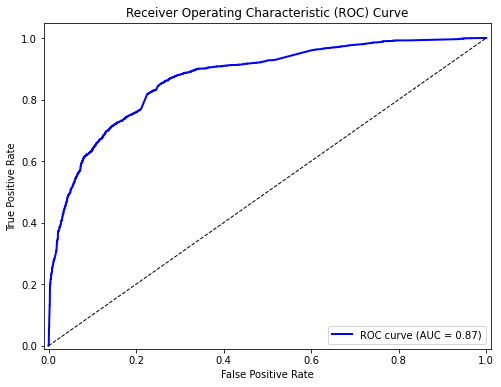

In [109]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Probability'])

### Testing the model

In [110]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2772 non-null   int64  
 1   TotalVisits                                           2772 non-null   float64
 2   Total Time Spent on Website                           2772 non-null   float64
 3   Page Views Per Visit                                  2772 non-null   float64
 4   A free copy of Mastering The Interview                2772 non-null   int64  
 5   Lead Origin_Landing Page Submission                   2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                            2772 non-null   uint8  
 7   Lead Source_Direct Traffic                            2772 non-null   uint8  
 8   Lead Source_Facebook                                  2

In [111]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,1,0,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,0,0,0,0,1
9199,-0.885371,0,0,0,0,0,0,1,0,0,1,0
4359,-0.885371,0,1,0,0,0,0,0,0,0,0,0


In [112]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [113]:
# Predictions on the test set with the final model 
y_test_pred = logm4.predict(X_test_sm)

In [114]:
# Converting y_test_pred to a dataframe as it is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1

,0
4269,0.753163
2376,0.868534
7766,0.884718
9199,0.045039
4359,0.856614
...,...
8649,0.145780
2152,0.343348
7101,0.133181
5331,0.629836


In [130]:
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1
...,...
8649,0
2152,1
7101,0
5331,0


In [116]:
# Assigning index to the Customer ID
y_test_df['Cust_Id'] = y_test_df.index

In [117]:
# Removing the index from both dataframes to facilitate merging them side by side.
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [118]:
# Combining y_test_df and y_pred_1 into y_pred_final dataframe
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [119]:
y_pred_final

,Converted,Cust_Id,0
0,1,4269,0.753163
1,1,2376,0.868534
2,1,7766,0.884718
3,0,9199,0.045039
4,1,4359,0.856614
...,...,...,...
2767,0,8649,0.145780
2768,1,2152,0.343348
2769,0,7101,0.133181
2770,0,5331,0.629836


In [120]:
# Renaming the '0' column as Converted probablity
y_pred_final = y_pred_final.rename(columns={0:'Converted_Probability'})

In [121]:
y_pred_final

,Converted,Cust_Id,Converted_Probability
0,1,4269,0.753163
1,1,2376,0.868534
2,1,7766,0.884718
3,0,9199,0.045039
4,1,4359,0.856614
...,...,...,...
2767,0,8649,0.145780
2768,1,2152,0.343348
2769,0,7101,0.133181
2770,0,5331,0.629836


In [122]:
y_pred_final['predicted_test'] = y_pred_final['Converted_Probability'].map(lambda x: 1 if x > 0.35 else 0)

In [123]:
y_pred_final

,Converted,Cust_Id,Converted_Probability,predicted_test
0,1,4269,0.753163,1
1,1,2376,0.868534,1
2,1,7766,0.884718,1
3,0,9199,0.045039,0
4,1,4359,0.856614,1
...,...,...,...,...
2767,0,8649,0.145780,0
2768,1,2152,0.343348,0
2769,0,7101,0.133181,0
2770,0,5331,0.629836,1


In [124]:
# Creating Lead Score column
y_pred_final['Lead Score'] = round((y_pred_final['Converted_Probability']*100))
y_pred_final.head()

,Converted,Cust_Id,Converted_Probability,predicted_test,Lead Score
0,1,4269,0.753163,1,75.0
1,1,2376,0.868534,1,87.0
2,1,7766,0.884718,1,88.0
3,0,9199,0.045039,0,5.0
4,1,4359,0.856614,1,86.0



Customers with a Lead Score greater than 35 will be converted, given the probability cutoff of 0.35. The likelihood of conversion increases with a higher Lead Score.

In [125]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['predicted_test'])
confusion2

array([[1331,  346],
       [ 260,  835]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
# Accuracy- Test Set6
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['predicted_test'])

0.7813852813852814

In [128]:
# Sensitivity for test set
print("Sensitivity:",TP / float(TP+FN))

Sensitivity: 0.7625570776255708


In [129]:
# Specificity 
print("Specificity:",TN / float(TN+FP))

Specificity: 0.7936791890280263


### Inference

**Train Set**

- Accuracy = 0.783704390847248
- Sensitivity = 0.7623682076236821
- Specificity = 0.7968515742128935

**Test Set**

- Accuracy = 0.7813852813852814
- Sensitivity = 0.7625570776255708
- Specificity = 0.7936791890280263